# Искажение объектива

1. Напиши формулу.
2. Покажи py с функцией, реализующую формулу на бумаге.
3. Покажи ipynb . где загружаешь картинку.
4. Покажи слайдер в ipynb (я предполагаю, что человек исп стандарные виджеты) ,
где можно налету корректировать дисторсию туда-сюда.

# Пункт 1
Выполню описание формулы радиальной дисторсии
1. (cx, cy) — оптический центр изображения.
2. k1, k2 — коэффициенты радиальной дисторсии.
3. Нормализуем координаты, переносим центр координат в оптический центр (cx, cy):   
x_prime = x_old - cx    
y_prime = y_old - cy
4. Вычисляем квадрат радиуса, расстояние от центра до точки используется в формуле искажения    
r² = x_prime² + x_prime²
5. Основная формула коррекции, вычисляем коэффициент коррекции  
correction_factor = (1 + k1 * r² + k2 * r⁴)
6. Применяем коррекцию, получаем новые координаты в нормализованной системе и возвращаемся в исходную систему координат:    
new_x = x_prime * correction_factor + cx    
new_y = y_prime * correction_factor + cy

In [5]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
import cv2 

# Пункт 2
Опишу полностью логику работы фукнции которая искажает изображение.
1. Вытаскиваем из изображения данные высоты и ширины и вычисляем координаты центра изображения
2. Заполняем новое изображение нулями, размер которого соответсвует размеру исходного изображения
3. Вычисляем новые координаты, для этого нормализуем координаты, переместив центр в (0;0) (для облегчения вычислений), считаем расстояние от нового центра до координат, вычисляем фактор корректирования для дисторсии и обновляем координаты в соотвествии с формулой, записываем новые координаты в новое изображение, предварительно вернув координаты центра в исходный центр

In [6]:
image = cv2.imread('image.png')

def distort(old_image, k1, k2=0):
    h, w = old_image.shape[:2] # высота и ширина изображения
    cx, cy = w / 2, h / 2 # координаты центра изображения
    new_image = np.zeros_like(old_image) # создаем пустое изображение
    for y_old in range(h): 
        for x_old in range(w):
            
            x_prime = x_old - cx
            y_prime = y_old - cy
            
            r_squared = (x_prime ** 2 + y_prime ** 2) / ((w/2) ** 2) # вычисляем и нормируем расстояние

            correction_factor = 1 + k1 * (r_squared) + k2 * (r_squared ** 2) #вычисляем корректирование, согласно формуле дисторсии

            #Находим новые координаты
            new_x = x_prime * correction_factor + cx
            new_y = y_prime * correction_factor + cy
            new_x_int = int(round(new_x))
            new_y_int = int(round(new_y))

            #Проверяем что новые координаты входят в диапазон изображения
            if 0 <= new_x_int < w and 0 <= new_y_int < h:
                new_image[y_old, x_old] = old_image[new_y_int, new_x_int]
    return new_image

print("Функция искажения изображения написана")


Функция искажения изображения написана


# Пункт 3
Загружаю изображение и демонстрирую работу написанной фукнции

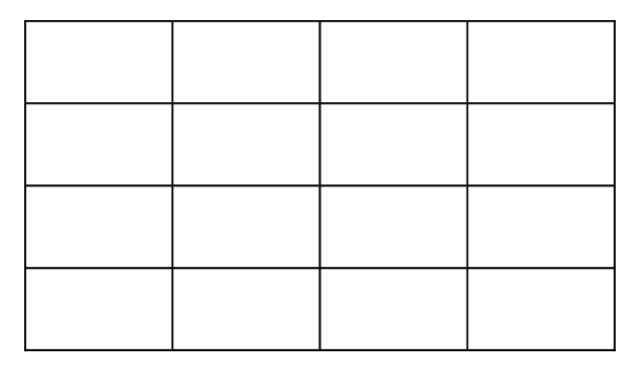

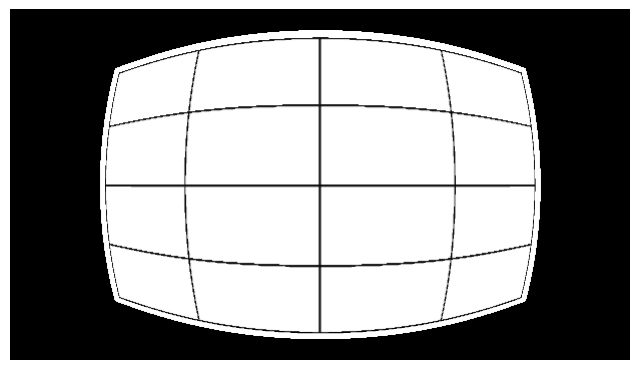

In [7]:
image = cv2.imread('image.png')
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()
plt.figure(figsize=(8, 8))
plt.imshow(distort(image, 0.3, 1))
plt.axis('off')
plt.show()

# Пункт 4
Продемонстрирую слайдер, с помощью которого можно выполнять искажение по написанной ранее функции

In [8]:
def interactive_correction(k_coeff1, k_coeff2):
    k1 = k_coeff1  
    k2 = k_coeff2

    corrected_image = distort(image, k1, k2)

    plt.figure(figsize=(8, 8))
    plt.imshow(corrected_image)
    plt.axis('off')
    plt.show()


slider1 = widgets.FloatSlider(
    min=-1.0, 
    max=1.0, 
    step=0.01, 
    continuous_update=False,
)
slider2 = widgets.FloatSlider(
    min=-1.0, 
    max=1.0, 
    step=0.01, 
    continuous_update=False,
)

widgets.interactive(interactive_correction, k_coeff1=slider1, k_coeff2=slider2)


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='k_coeff1', max=1.0, min=-1.…